In [17]:
# Cellule d'import des librairies 
import os 
import numpy as np 
import cv2 as cv 
import matplotlib.pyplot as plt 
from pathlib import Path
from random import sample 

from raft.raftutils import flow_viz

np.random.seed(0)

In [18]:
# Folder names 
modelFolder = Path("D:\\Master Thesis\\temp\\temp20230714\\all models results")
# Ground Truth 
GTfolder = Path("./data/test/masks/") 
# Frame 
RGBfolder = Path("./data/test/imgs")
# Optical Flow
Flowfolder = Path("./data/test/flows")

In [19]:
# Cellule d'import des fichiers 


# Resultats 
# modelNames = [
#     "celestial-bird-58", 
#     "cool-lion-105", 
#     "lilac-wildflower-117"
# ]

# RANDOM SPLIT 
modelNames = [
    "celestial-bird-58", 
    "zany-universe-60", 
    "breezy-snowball-61", 
    "dark-armadillo-62", 
    "balmy-disco-63", 
    "ethereal-violet-64"
]

# VIDEO SPLIT TEST = GREEN 
modelNames = [
    "lilac-wildflower-117", 
    "glorious-firefly-118", 
    "twilight-cloud-119", 
    "clean-donkey-121", 
    "upbeat-breeze-123", 
    "drawn-thunder-124"
]

# VIDEO SPLIT TEST = BEIGE 
modelNames = [
    "vibrant-mountain-111", 
    "devoted-pyramid-112", 
    "dashing-silence-113", 
    "soft-deluge-114", 
    "golden-dragon-115", 
    "frosty-dream-116"
]

# SEQUENCE SPLIT TEST = green0810_0840 
modelNames = [
    "cool-lion-105", 
    "earthy-frost-106", 
    "sparkling-energy-107", 
    "pretty-violet-108", 
    "upbeat-sponge-109", 
    "solar-snowball-110"
]

# GTEA 
modelNames = [
    "neat-valley-50", 
    "decent-firefly-54", 
    "azure-microwave-51", 
    "visionary-gorge-52", 
    "legendary-spaceship-55", 
    "hopeful-music-53"
]


nbOfModels = len(modelNames)
allFiles = []
for modelName in modelNames: 
    allFiles.append([f for f in (modelFolder/modelName).iterdir() if f.is_file()])
# print(allFiles)

# GT we keep 
allFilenames = [[f.stem for f in allFiles[i]] for i in range(nbOfModels)]
# print(len(allFilenames))

allGT = []
for f in GTfolder.iterdir(): 
    if f.is_file(): 
        i = 0 
        while i < nbOfModels and f.stem in allFilenames[i]: 
            i += 1 
        if i >= nbOfModels: 
            allGT.append(f)
nGT = len(allGT)

nlimit = 6
if nGT > nlimit: 
    indices_random = sample(range(nGT),6)
    allGT = [allGT[i] for i in indices_random]
nGT = len(allGT)
# print(nGT)

allRGB = [RGBfolder/f.name for f in allGT]
allFlows = [Flowfolder/(f.stem+'.npy') for f in allGT]

allKeptFiles = [[modelFolder/modelName/f.name for f in allGT] for modelName in modelNames]

In [20]:
# Create lists of images 
allModelResults = []
for i in range(nbOfModels): 
    allModelResults.append([cv.imread(str(img), cv.IMREAD_GRAYSCALE) for img in allKeptFiles[i]])

allGTarrays = [cv.imread(str(img)) for img in allGT]

allRGBarrays = [cv.imread(str(img), cv.COLOR_RGB2BGR) for img in allRGB]

newsize = allGTarrays[0].shape[1],allGTarrays[0].shape[0]
allFlowarrays = [cv.resize(flow_viz.flow_to_image(np.load(str(img))),newsize) for img in allFlows]

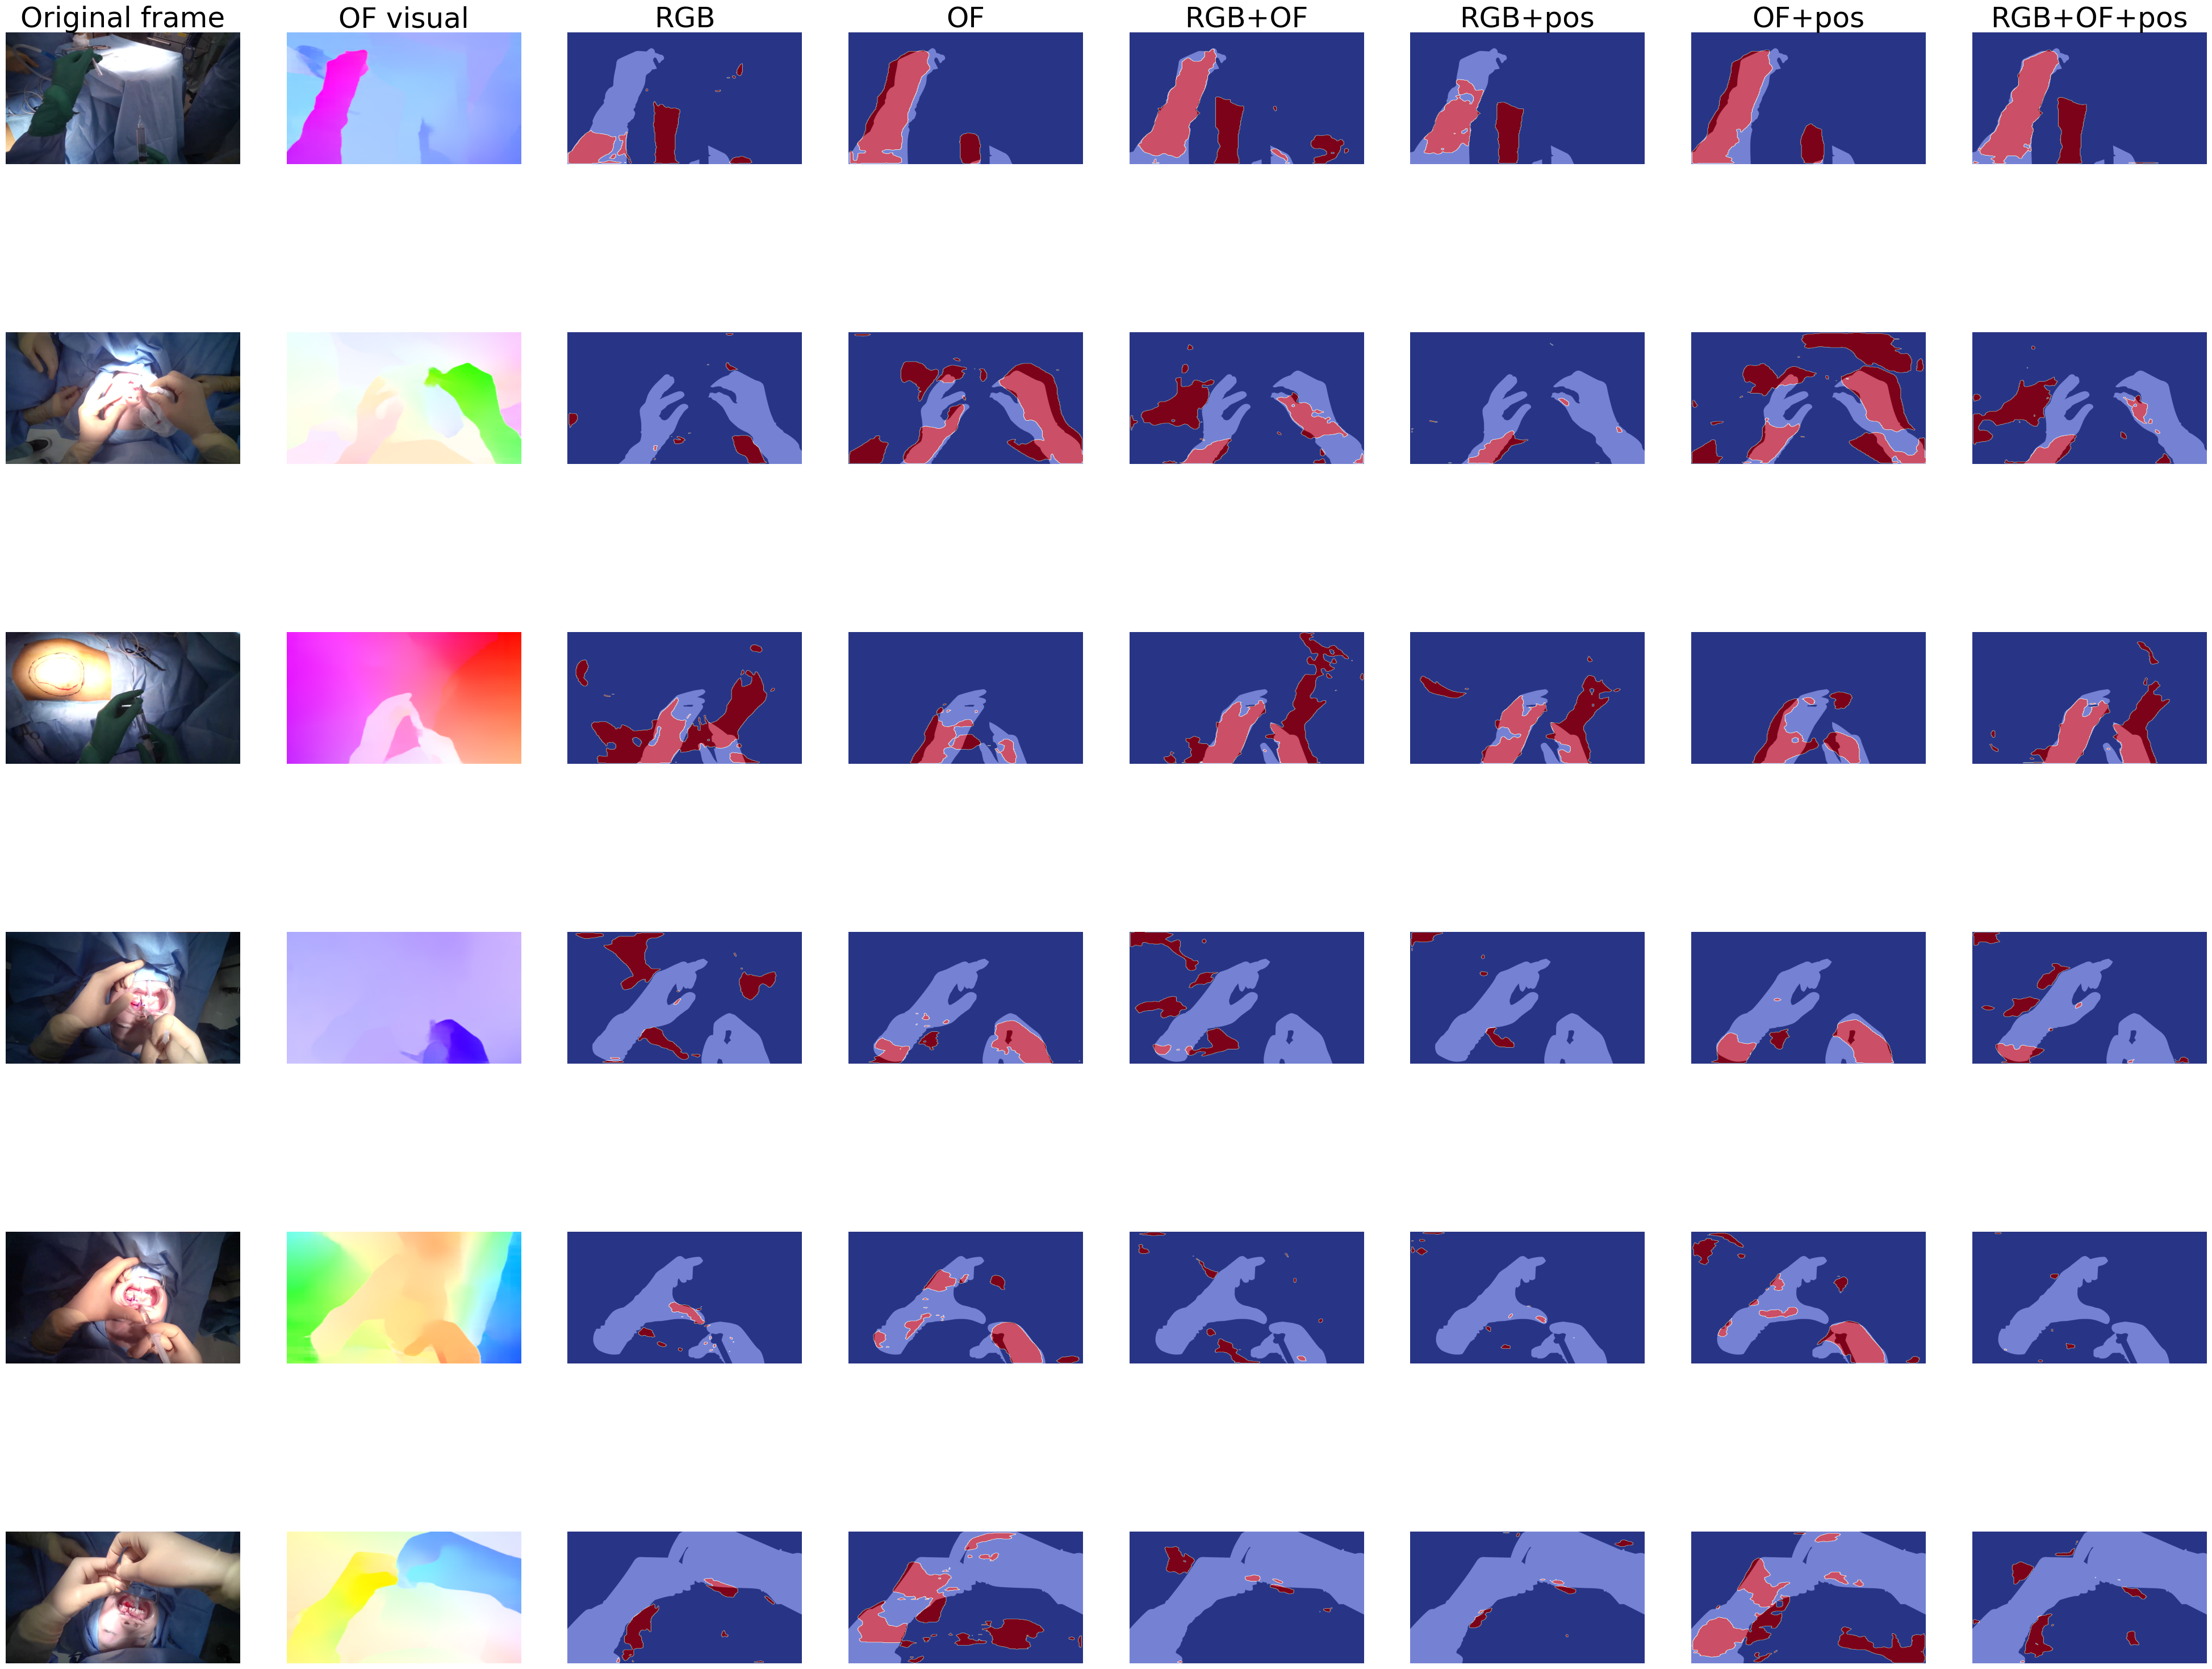

In [21]:
n = nGT
nbFolder = nbOfModels
plt.rcParams.update({'font.size': 30})
fig, axs = plt.subplots(nrows=n, ncols=nbOfModels+2, figsize=(50,40))
# fig.suptitle(t="Segmentation results")

for i in range(n): 
    axs[i][0].imshow(allRGBarrays[i][:,:,(2,1,0)])
    axs[i][0].axis('off')
    axs[i][1].imshow(allFlowarrays[i])
    axs[i][1].axis('off')
    for j in range(nbOfModels): 
        axs[i][j+2].imshow(allGTarrays[i])
        axs[i][j+2].imshow(allModelResults[j][i], alpha = 0.7, cmap='coolwarm')
        axs[i][j+2].axis('off')

# Put Title to columns 
# coltitles = ["Original frame", "OF visual", "Random Split", "Sequence Split", "Video Split"]
coltitles = ["Original frame", "OF visual", "RGB", "OF", "RGB+OF", "RGB+pos", "OF+pos", "RGB+OF+pos"]
# coltitles = modelNames 
for ax, col in zip(axs[0], coltitles):
    ax.set_title(col)
for ax in axs:
    for subplot in ax: 
        subplot.set_anchor('N')
plt.show()